# Chapter 6: Bio-inspired optimization

*Selected Topics in Mathematical Optimization*

*2016-2017*

**Bernard De Baets**

**Michiel Stock**

**Raúl Pérez-Fernández**

![Yes, this is how it works...](Figures/evolve_alg.gif)

In [1]:
from random import random, choice, uniform,randint,shuffle
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
%matplotlib inline

## Introduction and general idea

The open (or obsessive) mind can find optimization everywhere in the world around him. Ants find the optimal paths from food to their nest, rivers stream to maximize their water flow, plants maximize the amount of sunlight captured with their leafs and many of the laws of physics can be formulated as a minimization of energy. Bio-inspired optimization, or bio-inspired computing in general, borrows ideas from nature to solve complex problems. A central theme among these paradigms is that they use simple, local manipulations from which the general computation is an emergent property. Many also make use of a **population** of candidate solutions which is improved iteratively.

Bio-inspired optimization algorithms (BIOAs) are often applied for more complex problems discussed so far. Many real-word problems are often over-or underconstrained, lack detailed information about the target function (e.g. no gradient can be computed) or deal with complex 'structured data'. Examples of such problems which (bio)engineers routinely deal with include designing an antenna, callibrating a forest fire model or create a new functional peptide (topic of this project).

Contrary to most of the algorithms discussed so far, BIOAs often lack theoretical guarantees, both on their running time and on the quality of the solution. It is not uncommon to let such algorithms run for days or weeks. Since these algorithms do not exploit the structure or the gradient of the target function, only function evalutions are used. This is especially costly when evaluating the target function is expensive, for example when determining the parameters of a large set of ordinary differential equations. Furthermore, most bio-inspired optimization algorithms have some hyperparameters which must be tuned to the problem, otherwise the optimization might run badly.

Despite these drawbacks, BIOAs also have many merits. Because they are very flexible, they can be applied to almost any optimization problem. For some problem classes (such as NP-hard problems), there are no efficient exact solvers, making for example the traveling salesman problem unsolvable for moderately large instances using standard techniques. BIOAs on the other hand can often generate reasonable solutions quite quickly. Furthermore, BIOAs work **progressive**, meaning that intermediate solutions can be obtained at any time. Hence, even if the optimization process is prematurely aborted, we still have some result to show for our effort.

BIOA come in [many flavors](https://arxiv.org/pdf/1307.4186.pdf), which is one of the reasons why some of researchers dislike them. An important class of algorithms try to mimic swarm intelligence, for example how ants find their way in their surroundings is implemented in ant colony optimization. In this project we will work with genetic algorithms (GAs), which are based on the most succesful optimization algorithm in nature: evolution. GAs use *in silico* evolution to obtain iteratively better solutions for a problem. Most GAs are based on the following four concepts:
- **maintenance of a population**
- **creation of diversity**
- **a natural selection**
- **genetic enheritance**

![](Figures/GAconcept.png)

## Genetic representation

![Genotype, phenotype and fitness.](Figures/encoding.png)

**genotype**: representation of a candidate solution on which the genetic algorithm will operate

- often discrete representation (e.g. binary encoding of numbers)
- ideally covers the space of optimal solutions (prior knowledge)
- recombination should have high probability of generating increasingly better individuals

**phenotype**: the candidate solution in a representation of the problem

- **decoding**: translating genotype into phenotype
- **encoding**: translating the phenotype in genotype

Since the genetic operators of the GA only work on the genotype, only decoding has to be defined.

**fitness**: the quality of the solution, will be used to select individuals for the next generation

## Selection and reproduction

**Selection** is the procedure such that individuals with a higher fitness are more likelily to go to the next generation.

Usually the population size is fixed. individuals with high fitness are likely to be selected multiple times, those with low fitness might not be selected.

**Roulette wheel selection**

![Roulette wheel selection chooses individuals proportional to their fitness.](Figures/roulettewheel.png)

A new population of $n$ individuals is chosen by chosing individuals proportional to their fitness:

$$
p(i) = \frac{f(i)}{\sum_{j=1}^nf(j)}\,,
$$
with $p(i)$ the probability of choosing individual $i$ and $f(i)$ the fitness of individual $i$.

Drawbacks:
- only when fitness is positive
- selection process dependent on (nonlinear) scaling of fitness

**Tournament selection**

Randomly choose two individuals, retain the individual with the highest fitness for the population of the next generation (pick one at random if fitness is equal). Repeat as many times as there are individuals in the population.

Below is an illustration of the two types of selection.

In [2]:
# generate random initial population
population_fitness = [np.random.randn()**2 for _ in range(1000)]

In [3]:
# roulette wheel selection
population_fitness_roulette = []
finess_sum = np.sum(population_fitness)
while len(population_fitness_roulette) < len(population_fitness):
    fitness = choice(population_fitness)
    if fitness / finess_sum > random():
        population_fitness_roulette.append(fitness)

In [4]:
# tournament selection
population_fitness_tournament = []
while len(population_fitness_tournament) < len(population_fitness):
    selected_fitness = max(choice(population_fitness), choice(population_fitness))
    population_fitness_tournament.append(selected_fitness)

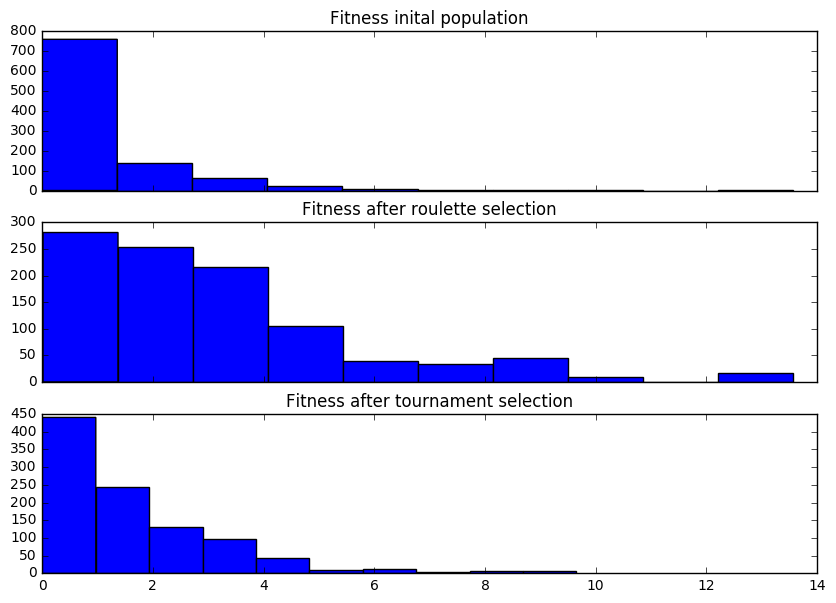

In [5]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharex=True, figsize=(10, 7))

ax0.hist(population_fitness)
ax1.hist(population_fitness_roulette)
ax2.hist(population_fitness_tournament)

ax0.set_title('Fitness inital population')
ax1.set_title('Fitness after roulette selection')
ax2.set_title('Fitness after tournament selection')

**Elitism**: after selection and recombination, the individual with the highest fitness is often retained in the population. This way the best fitness of the population will never decrease.

## Genetic operators

Selection increases the average quality of the candidate solutions, at the cost of decreasing the population diversity.

**Recombination** is the process of bringing back diversity into the population *without any regards for fitness*.

### Mutations

- small change to the genotype
- mutations operate at the level of the individual
- example: flipping a bit in a binary representation
- example: adding a normally distributed number to a real value

### Crossover

**Crossover** recombined two individuals (parents) into two children by randomly switching parts of the genotype

Types of crossover:
- **one-point**: select randomly a crossover point on each of the two strings and swapping around this point
- **multipoint**: the same, but with $n$ crossover points
- **uniform**: each element is switched between the parents with a certain probability (usually 50%)
- specialised crossovers for graphs, cycles or trees

![Examples of simples crossover.](Figures/crossover.png)

# Algorithms

### Hill climbing

- iterative improvement of starting point
- converges to local optimum (dependent on starting position)
- usually executed multiple times with different initial conditions

```
Hill climbing algorithm
    choose a random current_solution
    local := FALSE  // assume solution is not in local optimum
    
    while local is FALSE:
        set local to TRUE
        for all neighbors of current_solution:
            if neighbor improves current_solution:
                set local to FALSE
                current_solution := neighbor
                
    return current_solution
```

**Advantages**:
- easy to implement
- only needs the scoring function and a definition of neighborhood to search

**Disadvantages**:
- converges to a local optimum that is dependent of the starting position
- no guarantees on the quality of the solution
- no guarantees on the running time

### Simulated Annealing

- instead of scanning the whole neighborhood, one candidate solution is randomly chosen
    - if the new solution has a higher fitness: accept it
    - if it has a lower fitness, accept with probability $e^{\Delta f / T}$
- the temperature $T$ controls the **exploration** vs **exploitation** trade-off
- the temperature is gradually decreased when running the algorithm

```
Simulated annealing algorithm(Tmax, Tmin, r, kT)
    choose random initial point x
    T := Tmax
    while T > Tmin
        repeat kT times
            randomly choose xn from neigborhood of x
            if f(xn) > f(x)
                x := xn
            else with probability exp( (f(xn) - f(x))/T )
                x := xn
         T := T * r
    return x  
```

**Example of simulated annealing**

$$
\min_x\ f(x) = |x\cos(x)| + \frac{|x|}{2}\,.
$$
f(x) is de functie. Optimaliseren naar x. Als je wiskundig zou zeggen geef x waar f(x) min: argmin f(x)

During each step, a new candidate solution is selected randomly according to

$$
x_n = x + \Delta x\,,
$$
with
$$
\Delta x \sim N(0, \sigma)\,.
$$

Wall time: 237 ms


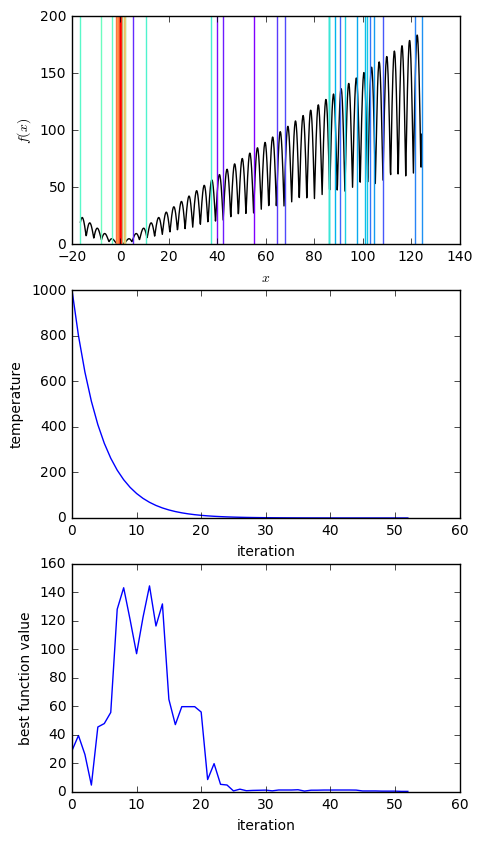

In [6]:
%%time
from simulated_annealing_demo import plot_SA_example

f_toy_example = lambda x : np.abs(x * np.cos(x)) + 0.5 * np.abs(x)
x0 = 55
# hyperparameters = {'Tmax' : 1000, 'Tmin' : 0.1,
#                     'r' : 0.8, 'kT' : 10, 'sigma' : 5}

hyperparameters = {'Tmax' : 1000, 'Tmin' : 0.01,
                    'r' : 0.8, 'kT' : 9, 'sigma' : 10}
#Good so far: 'kT'=9
##Course: sim an for discrete probs. Here for continuous prob. 
#sigma: stdev, 

plot_SA_example(f_toy_example, x0, hyperparameters)

### Genetic algorithm

```
Genetic algorithm(population size, number of generations, pmut, pcross)
    initialize a random population
    repeat for a number of generations
        use tournament selection to generate a new population
        recombinate the new population using mutations and crossover
        apply elitism
    return best individual of final population
```

## Project: Designing bio-active peptides

Some peptides have an anti-microbial function. These peptides originate from the innate immuum system and are found in nearly all classes of life. These peptides often have a general mode of action and are thus effective against a broad range of microorganisms and it is quite difficult to acquire resistence for these organisms. As such they are an attractive alternative to conventional antibiotics.

![Two possible mechanisms how a peptide can target a bacterial cell.](Figures/Modes_of_action.png)

In this project we will use genetic algorithms (in the very broad sense) to design and optimize a novel anti-microbial peptide. For this, we have downloaded a fasta file containing the amino acid sequence of over two thousand anti-microbial peptides as a reference set from the [Collection of Anti-Microbial Peptides](http://www.camp.bicnirrh.res.in/) database. Using a machine learning technique called kernel embedding, we have modelled the distribution of these peptides. This model can be used to generate a score between 0 and 1 for a given peptide, representing our belief that the peptide has an anti-microbial function (higher is better). The model is externally developed and is to us a black box.

For example:

In [7]:
from anti_microbial_peptide_model import score_peptide

Loading the sequences...
Loading the features...
Finished!


In [8]:
print(score_peptide('ASRTYUIPUYGRVHHGY'))  # a random peptide

6.35396112848e-05


In [9]:
print(score_peptide('SKITDILAKLGKVLAHV'))  # a peptide from the database

0.00770537270675


In [10]:
%timeit score_peptide('ASRTYUIPUYGRVHHGY')  # time to score a peptide

1000 loops, best of 3: 430 µs per loop


We will try to find a new peptide with a length of twenty amino acids with the highest possible score according to the given model. To this end, hill climbing, simulated annealing and genetic algorithms will be used.

For the problem setting at hand, we clarify the following terminology:
- The **neigborhood** of a peptide: the set of all peptides which differ with exactly one amino acid compared to the given peptide
- When a **mutation** occurs, a residue of a peptide is replaced by a randomly chosen amino acid. In our implementation of simulated annealing and the genetic algorithm, each amino acid in a peptide has a small fixed probability `pmut` to be mutated.
- During a **crossover** event between two peptides, at each position the corresponding residues of the peptides are either switched or remain unchanged with equal probability. Crossovers occur between two randomly selected individuals with a probability `pcross`.

**Assignment 1**

Complete the implementation of the function `hill_climbing` to bring either a given peptide or a randomly generated peptide of a given length to a local optimum. Run the algorithms ten times to generate optimized peptides of length twenty. What scores do you get? Describe these plots.

In [11]:
from protein_sequence_features import amino_acids

amino_acids  # the amino acids. Type is list. Print out as array to improve readability.
np.array(amino_acids)

array(['N', 'C', 'R', 'E', 'Q', 'K', 'Y', 'S', 'M', 'I', 'V', 'P', 'A',
       'T', 'L', 'H', 'F', 'W', 'G', 'D'], 
      dtype='<U1')

In [12]:
## Added these to be able to make peptide without having to use hill_climbing function
%timeit ''.join(np.random.choice(amino_acids,size=20))

The slowest run took 4.46 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 24.4 µs per loop


In [13]:
%%timeit
## Added these to be able to make peptide without having to use hill_climbing function
test_pep=''
for i in range(20):
    test_pep+=choice(amino_acids)
test_pep

10000 loops, best of 3: 19.8 µs per loop


In [14]:
def explore_peptide_region(peptide, scoring):
    """
    Searches all neighboring peptides of a given peptide that differ exactly one
    amino acid
    """
    best_score=scoring(peptide)
    best_peptide=(peptide+'.')[:-1]
    for i in range(len(peptide)):
        for a_acid in (set(amino_acids)-set(peptide[i])):
            neighbour=peptide[:i]+a_acid+peptide[i+1:]
            score=scoring(neighbour)
            if score>best_score:
                best_peptide=(neighbour+'.')[:-1]
                best_score=score  
    return best_score, best_peptide


def hill_climbing(peptidesize=None, peptide=None, scoring=score_peptide):
    """
    Uses hill climbing to find a peptide with a high score for
    antimicrobial activity.

    Inputs:
        - peptidesize : give size if started from a randon peptide (Has certain minimum length. Can work always with length 20)
        - peptide : optionally give an intial peptide to improve
        - scoring : the scoring function used for the peptides

    Outputs:
        - peptide : best found peptide
        - best_scores : best scores obtained through the iterations
    """
    assert peptidesize is not None or peptide is not None
    # if no peptide is made, give a random one
    if peptide is None:
        peptide = ''
        for res in range(peptidesize):
            peptide += choice(amino_acids)
#         print(peptide)
    else:
        peptidesize = len(peptide)
    best_scores = [scoring(peptide)]
    #peptides = [peptide]#Original
    while True:
        new_score, new_peptide =explore_peptide_region(peptide,scoring) # find  
        if peptide!=new_peptide:  #  improvement?
            peptide=(new_peptide+'.')[:-1]
            best_scores.append(new_score)
        else:
            break
    return peptide, best_scores

In [15]:
## For testing the code
# high,new_pept=explore_peptide_region(test_pep,score_peptide)#Uncomment to view
# print(high)
# print(new_pept)
# print(score_peptide(test_pep))
# print(test_pep)

In [16]:
## For testing the code
# local,scores=hill_climbing(peptidesize=20)#Uncomment to view
# scores

Best score out of 10: 0.03328470512892623
Wall time: 37.2 s


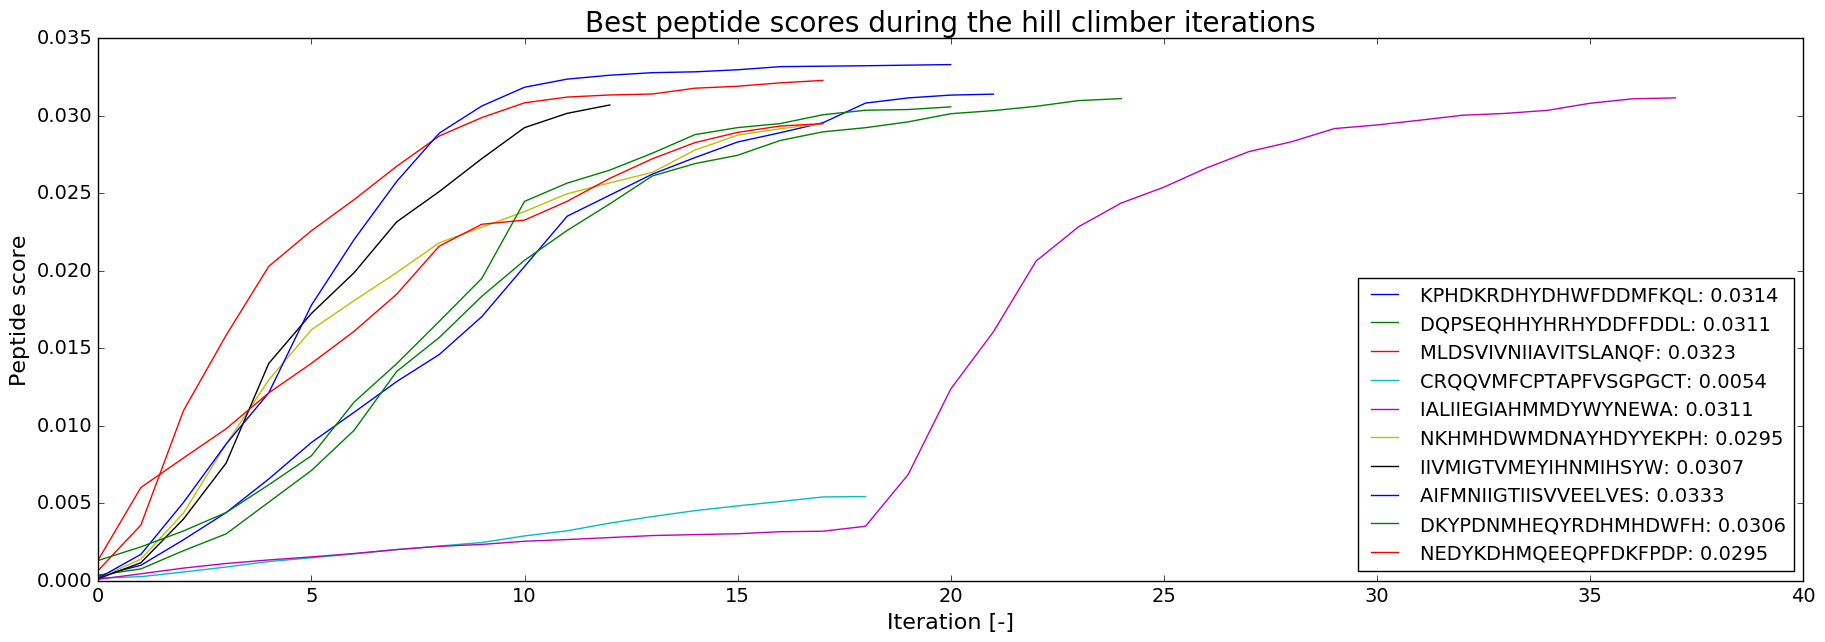

In [17]:
%%time
# make a plot of the running of hill climbing 
# for ten runs

fig, ax = plt.subplots(figsize=(22,7))
#figsize=(w,h) in inches
best_out_of_10=0
for i in range(10):
    local,scores=hill_climbing(peptidesize=20)
    if scores[-1]>best_out_of_10:
        best_out_of_10=scores[-1]
    ax.plot(range(len(scores)),scores,label='{}: {}'.format(local,str(round(scores[-1],4))))
#     ax.plot(range(len(scores)),scores,label='{peptide}: {score}'.format(peptide='bli',score='bloe')
#     ax.plot(range(len(scores)),scores,label='{}:'.format(local))
ax.set_title('Best peptide scores during the hill climber iterations' ,fontsize=20)
ax.set_xlabel('Iteration [-]',fontsize=16)
ax.set_ylabel('Peptide score',fontsize=16)
ax.legend(loc=0,fontsize=14)
# ax.get_xaxis().get_major_formatter().set_useOffset(False)#Don't do strange formatting on axis labels
ax.tick_params(axis='both', which='major', labelsize=14)#Major tick labels fontsize
ax.tick_params(axis='both', which='minor', labelsize=14)#Minor tick labels fontsize
print('Best score out of 10: {}'.format(best_out_of_10))

COMMENT ON THIS PLOT. HOW ARE THE DIFFERENT RUNS THE SAME AND WHAT DO THEY HAVE IN COMMON?  <span style="background-color: #FFFF00">Probably meant: how are they the same, and in what do they differ?</span><br>
They are the same in the fact that the function value, the peptide score, only increases, which is inherent to the hill climber algorithm.

They are different in the fact that different maximizers and optima are found, which are thus very likely local maximizers and optima. This is also inherent to the hill climber, since it will get stuck in a local optimum if this is encountered.<br>
They are also different in shape. The hill climber algorithm will always follow the exact same route to the concerning local optimum, when it starts from a specific starting point. Thus, the route - and hence the shape of the plot for a specific run - is inherent to the staring point.

**Assignment 2**

Hill climbing greedily improves the given peptide until no single change of in amino acid residus increases the score. The solution of hill climbing is likely to be a local optimum (and not necessarily a good one!).

We will try to generate better peptides using simulated annealing (which only uses mutations to generate diversity in the candidate solutions) and a genetic algorithm (which uses both mutations as well as crossover to generate novel peptides). 

1. Complete the functions to generate diversity in the peptides. The function `mutate_peptide` takes a peptide as input and returns a new peptide where each amino acid is changed by a randomly chosen other peptide with a probability `pmut`. The function `crossover_peptides` requires two peptides of equal length as input and outputs the corresponding random crossover peptides.
2. Complete the function `simulated_annealing` to optimize random peptide of fixed length. Try to find an optimal peptide of length twenty. Discuss how to choose good values for `Tmin`, `Tmax`, `r` and `kT`.
3. Finally, complete the function `genetic_algorithm`. You also have to complete the functions `tournament_selection` and `recombinate` which will be used in the main algorithm. Try to find the an optimal peptide of length twenty as well, using some trial and error to find the hyperparameters. 
4. Compare the quality of the solution using hill climbing, simulated annealing and the genetic algorithm. If you take code complexity and computation time into account, which would you try first for general problems?

In [18]:
def mutate_peptide(peptide, pmut=0.05):
    """
    Replaces each amino acid of the peptide with an arbitrary chosen
    amino acid with a probability pmut
    """
    # complete this
    mutated_peptide=(peptide+'.')[:-1]
    for i in range(len(peptide)):
        if uniform(0, 1)<=pmut:
            mutated_peptide=mutated_peptide[:i]+choice(amino_acids)+mutated_peptide[i+1:]
    return mutated_peptide


def crossover_peptides(peptide1, peptide2):
    """
    Performs crossover for two peptides, each position is switched with equal
    probability.
    Note to myself: N-point crossover more interesting according to Michiel, since peptides probably effective due to active regions.
    Inputs:
        - peptide1, peptide2

    Outputs:
        - crossed_peptide1, crossed_peptide2
    """
    # complete this
#     mask=[uniform(0,1) for i in range(len(peptide1))]
    crossed_peptide1=''
    crossed_peptide2=''
    for i in range(len(peptide1)):
        p_mask=uniform(0,1)
        if p_mask<=0.5:
            crossed_peptide1+=peptide1[i]
            crossed_peptide2+=peptide2[i]
        else:
            crossed_peptide1+=peptide2[i]
            crossed_peptide2+=peptide1[i]
    return crossed_peptide1, crossed_peptide2

In [19]:
peptide1 = 'AAAAAAAAAAAA'
peptide2 = 'CCCCCCCCCCCC'

In [20]:
print(mutate_peptide(peptide1, pmut=0.1))

AAAAAAAAAAAF


In [21]:
print(*crossover_peptides(peptide1, peptide2))

ACAAAAACCCCA CACCCCCAAAAC


In [22]:
def simulated_annealing(peptidesize, Tmax, Tmin, pmut, r, kT,
                                                scoring=score_peptide,neighbour=False):
    """
    Uses simulated annealing to find a peptide with a high score for
    antimicrobial activity.

    Inputs:
        - peptidesize : length of the peptide
        - Tmax : maximum (starting) temperature
        - Tmin : minimum (stopping) temperature
        - pmut : probability of mutating an amino acid in the peptide
        - r : rate of cooling
        - kT : number of iteration with fixed temperature
        - scoring : the scoring function used for the peptides

    Outputs:
        - peptide : best found peptide
        - fbest : best scores obtained through the iterations
        - temperatures : temperature during the iterations
    """
    # create intial peptide
    peptide = ''
    for _ in range(peptidesize):
        peptide += choice(amino_acids)
#     print(peptide)
    temp = Tmax
    fstar = scoring(peptide)
    fbest = [fstar]
    temperatures = [temp]
    while temp > Tmin:
        for _ in range(kT):
            ##Not sure if have to follow pseudocode "randomly choose xn from neigborhood of x", or assignement: 
            ##"simulated annealing (which only uses mutations)". I will implement such that both options are available.
            if neighbour:#If you want to only choose neighbours
                place=randint(0, len(peptide)-1)
                while True:
                    mutation=choice(amino_acids)
                    if mutation!=peptide[place]:
                        break
                mutation_peptide=peptide[:i]+mutation+peptide[i+1:]
            else:#Else, use the function mutate_peptide
                mutation_peptide=mutate_peptide(peptide, pmut)
            f=scoring(mutation_peptide)
            if f>fstar:
                fstar=f
                peptide=(mutation_peptide+'.')[:-1]
            elif uniform(0,1)<=np.exp((f-fstar)/temp):
                fstar=f
                peptide=(mutation_peptide+'.')[:-1]
        temp*=r
        fbest.append(fstar)  # save best value
        temperatures.append(temp)  # save temperature
    return peptide, fbest, temperatures

First of all, compare choose only neigbours vs. mutate peptide. However, I observed that - for the hyperparameters used by me - choose only neighbours performs considerably worse for much more iterations. Therefore, these cell are commented out, but it could be verified that both options works. 

In [23]:
# %%time
# peptide_SA, fitness, temperature = simulated_annealing(peptidesize=20,Tmax=1,Tmin=0.00001,pmut=0.1,r=0.98,kT=70)
# print(peptide_SA,fitness[-1])

In [24]:
# %%time
# peptide_SA, fitness, temperature = simulated_annealing(peptidesize=20,Tmax=0.1,Tmin=0.0000001,pmut=0.1,r=0.99,kT=90,neighbour=True)
# print(peptide_SA,fitness[-1])

Best score out of 10: 0.03370633887599412
Wall time: 1min 56s


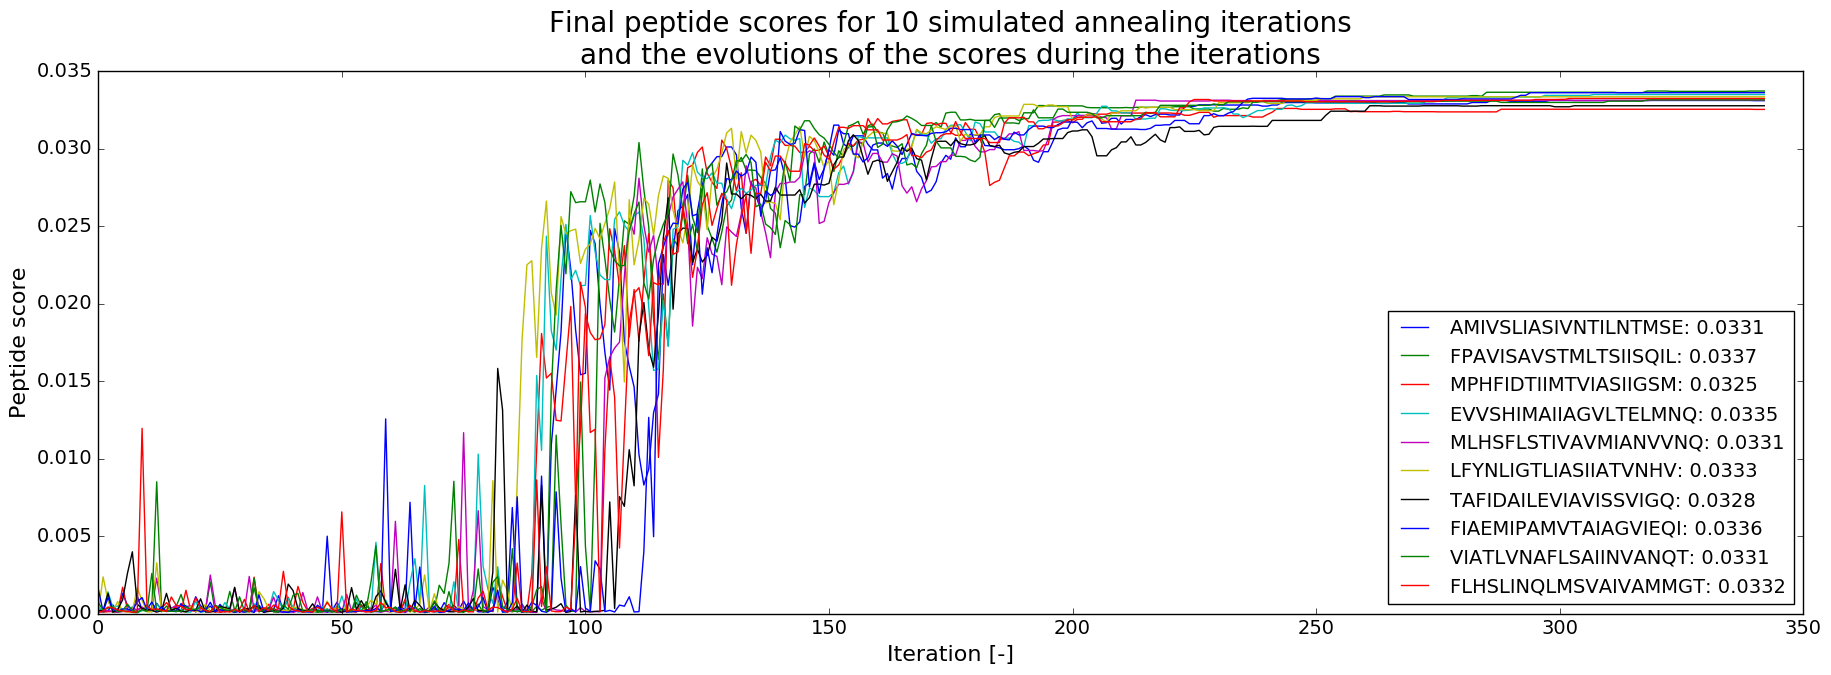

In [25]:
%%time
# make a plot for simulated annealing
fig, ax = plt.subplots(figsize=(22,7))
#figsize=(w,h) in inches
best_out_of_10=0
for i in range(10):
    peptide_SA, fitness, temperature = simulated_annealing(peptidesize=20,Tmax=0.01,Tmin=0.00001,pmut=0.1,r=0.98,kT=70)
#     peptide_SA, fitness, temperature = simulated_annealing(peptidesize=20,Tmax=1,Tmin=0.00001,pmut=0.1,r=0.98,kT=70)
    if fitness[-1]>best_out_of_10:
        best_out_of_10=fitness[-1]
    ax.plot(range(len(fitness)),fitness,label='{}: {}'.format(peptide_SA,str(round(fitness[-1],4))))
ax.set_title('Final peptide scores for 10 simulated annealing iterations\n\
and the evolutions of the scores during the iterations' ,fontsize=20)
ax.set_xlabel('Iteration [-]',fontsize=16)
ax.set_ylabel('Peptide score',fontsize=16)
ax.legend(loc=0,fontsize=14)
# ax.get_xaxis().get_major_formatter().set_useOffset(False)#Don't do strange formatting on axis labels
ax.tick_params(axis='both', which='major', labelsize=14)#Major tick labels fontsize
ax.tick_params(axis='both', which='minor', labelsize=14)#Minor tick labels fontsize
print('Best score out of 10: {}'.format(best_out_of_10))

DESCRIBE THE EFFECT OF THE HYPERPARAMETERS. MAKE A PLOT TO ILLUSTRATE THE BEHAVIOUR BELOW.<br>
The analysis of the effect of the hyperparameters was done without making a plot. Thus, I will first describe the effect of them and then make a plot.

First of all, if the cooling rate is too big, very quickly the searching behaviour will change from exploration to exploitation. This is probably not wanted, since the fact that simulated annealing explores, is actually the intention of this algorithm. Setting the cooling rate too big, will also lead to less outer iterations and thus overall less iterations. It is rather trivial that this leads to less searching and thus less chance of finding a good solution, since a stochastic component is built into the algorithm. This will however lead to quicker results. I had the impression that a very low cooling rate (i.e. a high r), leads to better results.

Besides, I think is useful to first determine a sensible temperature range. Due to the nature of the function values - they are very low, e.g. 0.001 or 0.003 - even when the temperature is already rather low, the chance of picking a worse solution is very high. For instance, $e^{(0.001-0.003)/0.1}=0.98$, or closer to the optima found with the hill climber: $e^{(0.01-0.03)/0.1}=0.82$. This already illustrates that the hyperparameter settings can be very specific for a certain problem, which is something professor De Baets always emphasizes, namely to not copy parameter setting from the literature without a good reason and expect them to work well for your problem.<br>
Thus, it is rather useless to start from a very high T, in particular when r is very high, because then a substantial amount of time will be spent on just trying random solutions. I think it is best to set the temperature range such that it is clear that some exploration happens in the beginning, which happens if fstar in the beginning clearly takes on lower values sometimes. Furthermore, also clearly exploitation must happen at the end. If the function values at the end of the iterations do not go down, or only go down very seldom, then exploitation happens. Thus I think both Tmax and Tmin must be set such that both phenomena clearly occur.

Next, in my opinion, kT can be used to enhance the exploration behaviour at the end of the iterations, at least, when the function mutate_peptide is used. This true because mutate_peptide doesn't necessarily generate neighbours of the peptide. In fact, if pmut is set very high, a totally different solution is tried every inner iteration. Thus, if kT is high, at the end of the iterations still some exploration goes on, but the newly tried options will be chosen almost exclusively if their fitness is higher. <br>
I found that setting kT very high, together with r very high, and the T range rather large, leads to the best solutions. Since even with these setting only rarely a solution is found that is better than the best out of 10 hill climber runs, I think these setting are indeed needed in this case (if I didn't make errors in the implementation).

Finally, pmut was already briefly mentioned. The way I implemented simulated annealing, a large pmut will lead to trying new solutions that differ substantially from the current best found solution. I observed that pmut=0.1 led to good solutions. In addition, I think that it might be a good idea to let this parameter evolve during the iterations: Small in the beginning to not deviate too much from a current peptide that is "investigated", or using the neighbour=True setting at the beginning. And large at the end, because - as mentioned - in this phase newly tried options will be chosen almost exclusively if their fitness is higher.

Below, a plot is made with the parameter settings I found to be the best. It can be tried to deviate from these parameter settings. The only parameters that I think could be altered are kT, which can be much lower without much consequences on the quality of the solution, pmut which can be set a bit lower without much consequences, and Tmax could be also be set to 0.001 which seems to no influence the quality of the solutions (as a matter of fact, it can be seen that at Tmax=0.001, still some exploration is going on at the beginning). However, since the solutions obtained through simulated annealing have about the same fitness as the ones obtained with the hill climber, I think the parameters cannot be changed much in a way that leads to quicker solutions, but likely less quality solutions (kT lower).

Wall time: 7.86 s


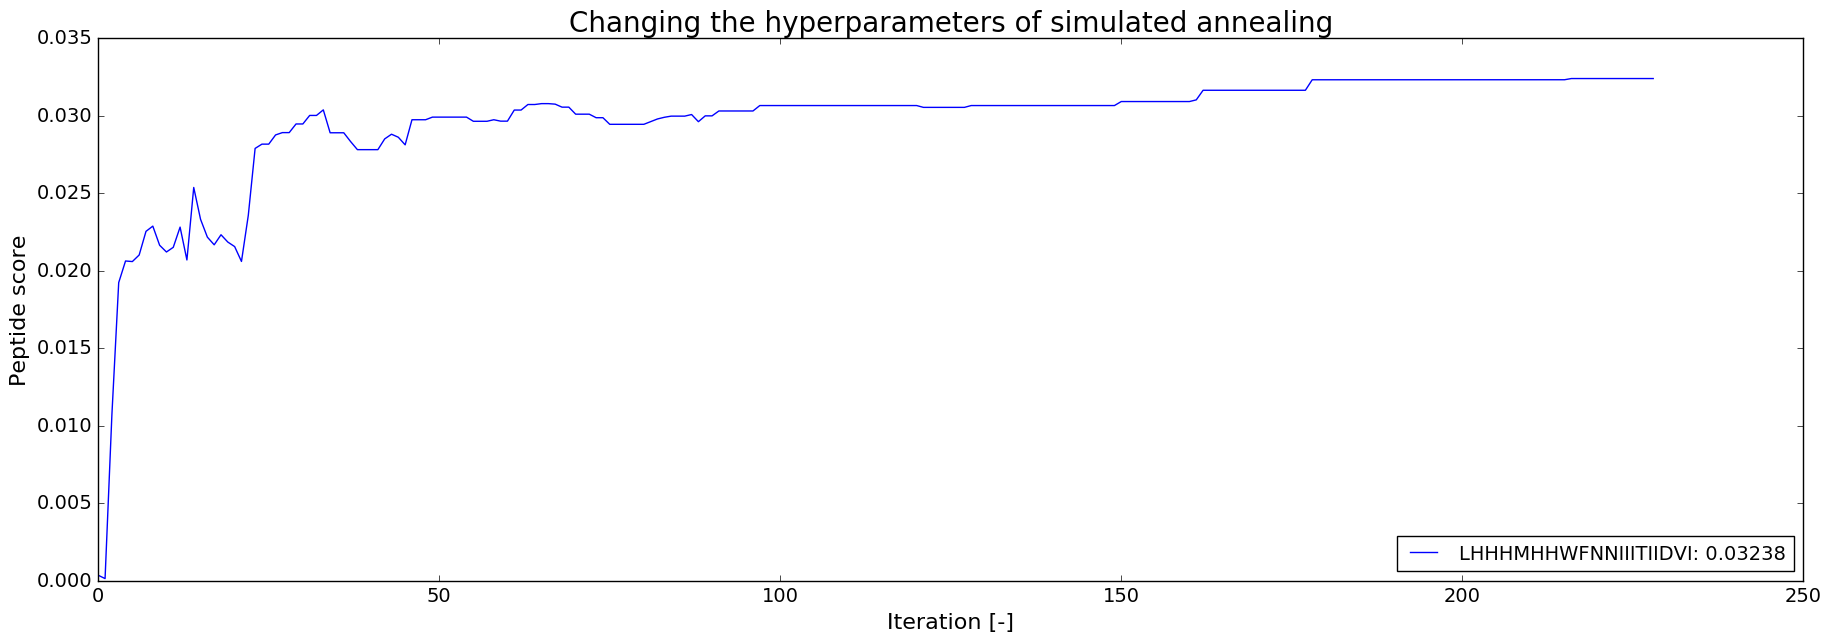

In [26]:
%%time
# EXPERIMENT WITH THE HYPERPARAMETERS OF SA HERE
# make a plot for simulated annealing
fig, ax = plt.subplots(figsize=(22,7))
#figsize=(w,h) in inches
peptide_SA, fitness, temperature = simulated_annealing(peptidesize=20,Tmax=0.001,Tmin=0.00001,pmut=0.1,r=0.98,kT=70)
# peptide_SA, fitness, temperature = simulated_annealing(peptidesize=20,Tmax=0.01,Tmin=0.00001,pmut=0.1,r=0.98,kT=70)
ax.plot(range(len(fitness)),fitness,label='{}: {}'.format(peptide_SA,str(round(fitness[-1],5))))
ax.set_title('Changing the hyperparameters of simulated annealing',fontsize=20)
ax.set_xlabel('Iteration [-]',fontsize=16)
ax.set_ylabel('Peptide score',fontsize=16)
ax.legend(loc=4,fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)#Major tick labels fontsize
ax.tick_params(axis='both', which='minor', labelsize=14)#Minor tick labels fontsize

In [27]:
def tournament_selection(scored_peptides):
    """
    Apply tournament selection on a list of scored peptides.

    Input:
        - scored_peptides2 : a list of scored peptides, each element is a tuple
                        of the form (score, peptide). 
    Output:
        - selected_peptides : a list of peptides selected from scored_peptides
                        based on tournament selection (without the score)
    """
    # complete this
    if scored_peptides[0][0]==scored_peptides[1][0]:
        selected_peptides=choice(scored_peptides)[1]
    else:
        selected_peptides=sorted(scored_peptides)[-1][1]
    return selected_peptides
##Didn't use this function
'''
def recombinate(population, pmut, pcross):
    """
    Recombinates a population of peptides.

    Inputs:
        - population : a list of peptides
        - pmut : probability of mutating an amino acid
        - pcross : probability of two peptides crossing over

    Output:
        - recombinated_population
    """
    recombinated_population = []
    # the population with mutation an cross over applied to
    return recombinated_population
'''

'\ndef recombinate(population, pmut, pcross):\n    """\n    Recombinates a population of peptides.\n\n    Inputs:\n        - population : a list of peptides\n        - pmut : probability of mutating an amino acid\n        - pcross : probability of two peptides crossing over\n\n    Output:\n        - recombinated_population\n    """\n    recombinated_population = []\n    # the population with mutation an cross over applied to\n    return recombinated_population\n'

In [28]:
def genetic_algorithm(peptidesize, n_iterations, popsize, pmut, pcross,
                                                    scoring=score_peptide):
    """
    Uses a genetic algorithm to find a peptide with a high score for
    antimicrobial activity.

    Inputs:
        - peptidesize : length of the peptide
        - n_iterations : number of iterations (generations)
        - popsize : size of the population
        - pmut : probability of mutating an amino acid in the peptide
        - pcross : probability of performing a crossover
        - scoring : the scoring function used for the peptides

    Outputs:
        - best_peptide : best found peptide
        - best_fitness_iteration : best scores obtained through the iterations
    """
    ## initialize population
    population = []
    for _ in range(popsize):
        peptide = ''
        for _ in range(peptidesize):
            peptide += choice(amino_acids)
        population.append(peptide)
    ## score peptides
    scored_peptides = [(scoring(peptide), peptide) for peptide in population]
    best_fitness, best_peptide = max(scored_peptides)
    best_fitness_iteration = [best_fitness]
    
    for iter in range(n_iterations):
        ## Recombination and mutation will pe performed directly in this funcion
        counter=0
        for i in range(int(len(scored_peptides)/2)):##Per 2 parents, 2 childs will be made
            ##Select parents
            parent1=tournament_selection([choice(scored_peptides) for _ in range(2)])
            parent2=tournament_selection([choice(scored_peptides) for _ in range(2)])
            ##Crossover if satisfied chance criterion
            if uniform(0,1)<=pcross:
                child1,child2=crossover_peptides(parent1, parent2)
                ##Mutations 
                population[counter]=mutate_peptide(child1, pmut)
                counter+=1
                population[counter]=mutate_peptide(child2, pmut)
                counter+=1
            else:
                ##Option to not mutate if parents don't crossover was also tried. The option to mutate the parents was retained, because
                ##I am under the impression that this leads to more freedom in toying with the hyperparameters.
                population[counter]=mutate_peptide(parent1, pmut)
                counter+=1
                population[counter]=mutate_peptide(parent2, pmut)
                counter+=1
#                 population[counter]=parent1
#                 counter+=1
#                 population[counter]=parent2
#                 counter+=1
        ##Score peptides
        scored_peptides = sorted([(scoring(peptide), peptide) for peptide in population])
        ##Elitism
        if scored_peptides[-1][0]<best_fitness:
            population[population==scored_peptides[0][1]]=best_peptide
            scored_peptides[0]=(best_fitness,best_peptide)
        shuffle(scored_peptides)##Keep randomness in the algorithm
        ## select best
        best_fitness, best_peptide = max(scored_peptides)
        best_fitness_iteration.append(best_fitness)

    return best_peptide, best_fitness_iteration

In [29]:
##Commented out in order not to make this notebook run for ages when it is corrected.
# %%time
# peptide_GA, best_fitness_iteration = genetic_algorithm(peptidesize=20, n_iterations=1000,
#                                         popsize=500, pmut=0.02, pcross=0.8, scoring=score_peptide)
# print(best_fitness_iteration[-1])

Best score out of 10: 0.03343334186952255
Wall time: 2min 7s


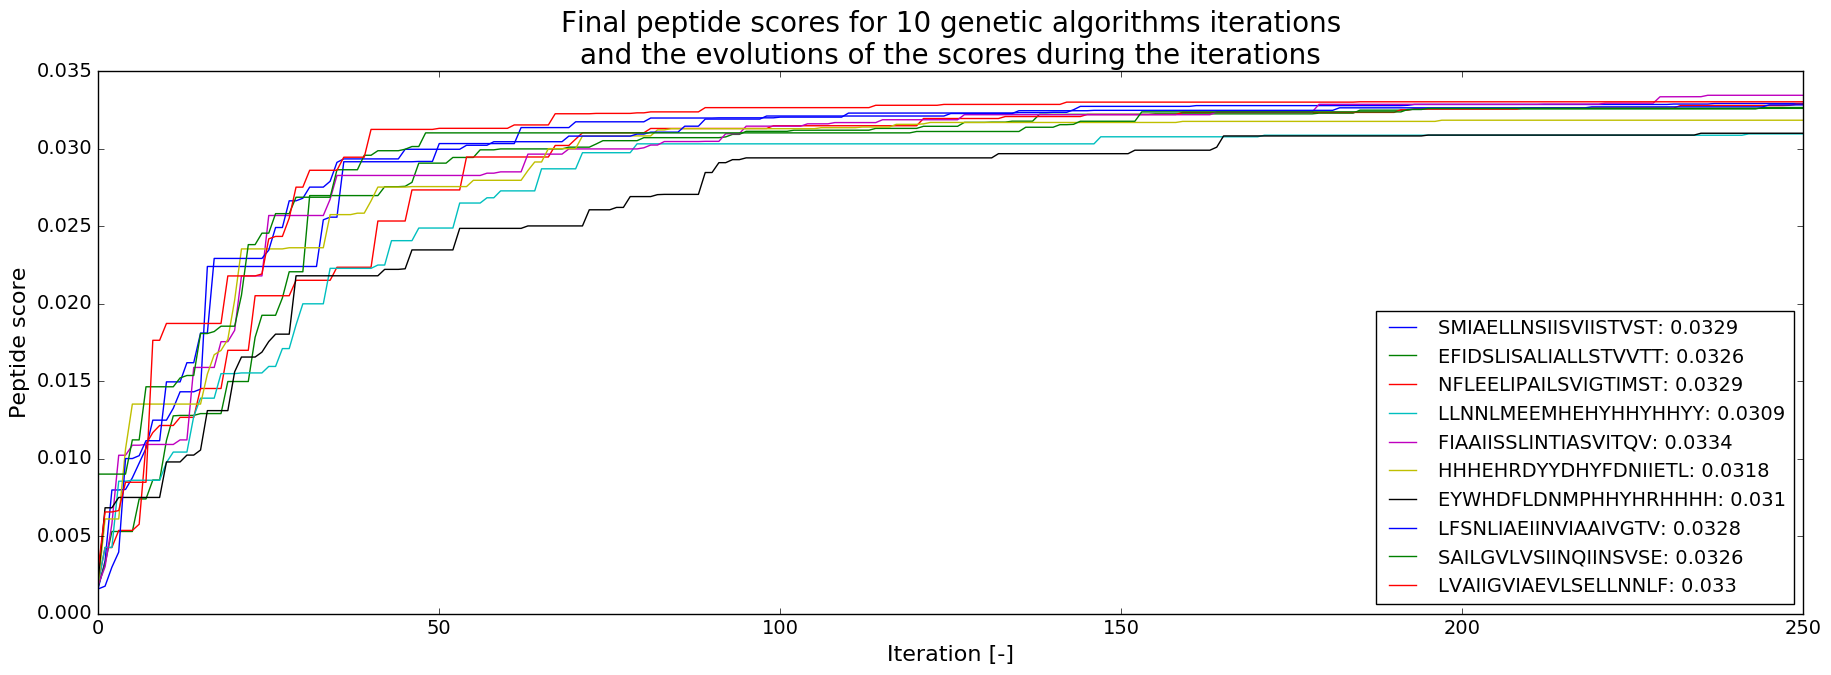

In [30]:
%%time
# make a plot for the genetic algorithm
fig, ax = plt.subplots(figsize=(22,7))
#figsize=(w,h) in inches
best_out_of_10=0
for i in range(10):
    peptide_GA, best_fitness_iteration = genetic_algorithm(peptidesize=20, n_iterations=250,
                                        popsize=100, pmut=0.05, pcross=0.8, scoring=score_peptide)
    if best_fitness_iteration[-1]>best_out_of_10:
        best_out_of_10=best_fitness_iteration[-1]
    ax.plot(range(len(best_fitness_iteration)),best_fitness_iteration,label='{}: {}'.format(peptide_GA,\
    str(round(best_fitness_iteration[-1],4))))
ax.set_title('Final peptide scores for 10 genetic algorithms iterations\n\
and the evolutions of the scores during the iterations' ,fontsize=20)
ax.set_xlabel('Iteration [-]',fontsize=16)
ax.set_ylabel('Peptide score',fontsize=16)
ax.legend(loc=0,fontsize=14)
# ax.get_xaxis().get_major_formatter().set_useOffset(False)#Don't do strange formatting on axis labels
ax.tick_params(axis='both', which='major', labelsize=14)#Major tick labels fontsize
ax.tick_params(axis='both', which='minor', labelsize=14)#Minor tick labels fontsize
print('Best score out of 10: {}'.format(best_out_of_10))

DESCRIBE THE EFFECT OF THE HYPERPARAMETERS. MAKE A PLOT TO ILLUSTRATE THE BEHAVIOUR BELOW.

In this case, the effect of the hyperparameters was indeed examined by plotting the behaviour. Therefore, the explanation will in this case be given below the plot.

Wall time: 9.24 s


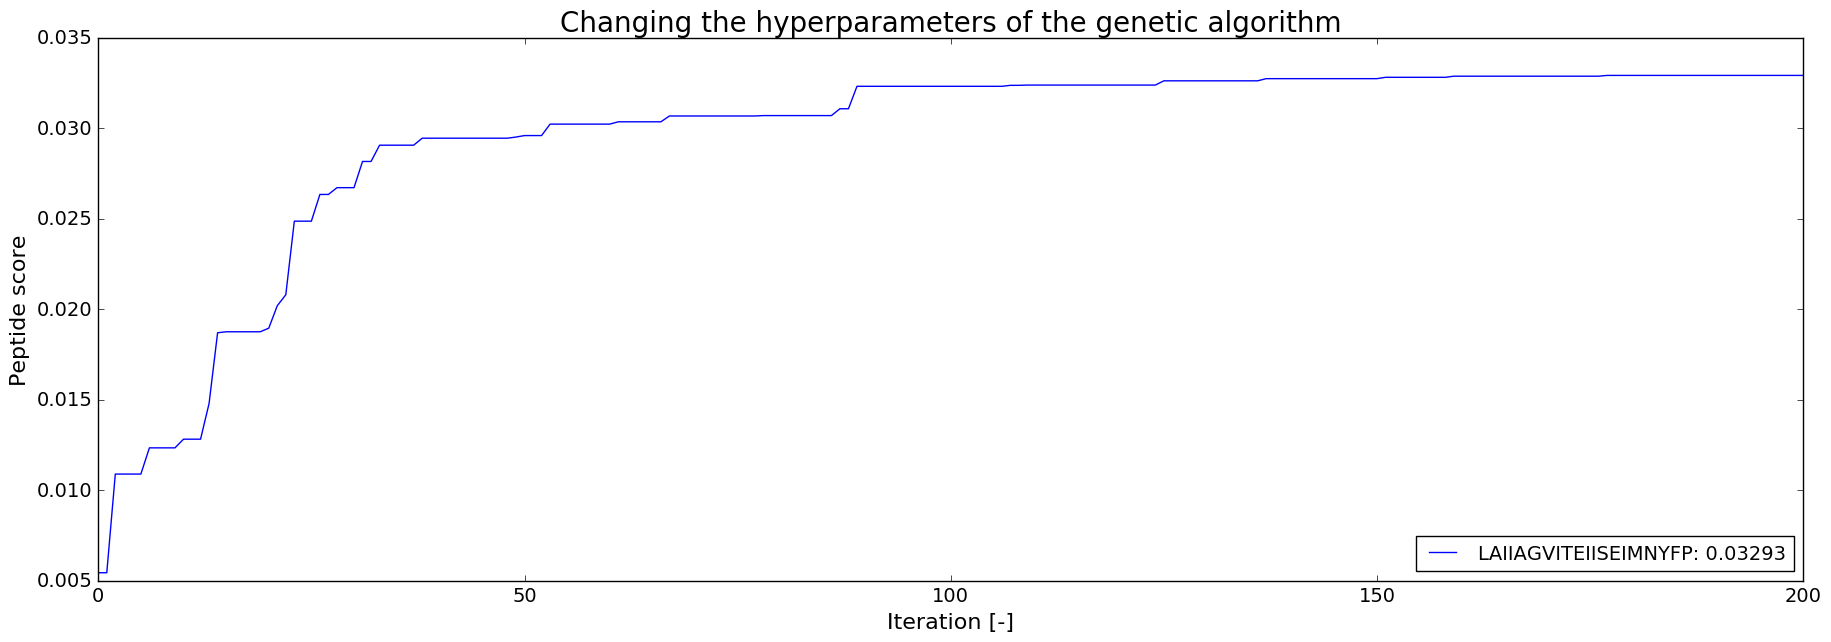

In [31]:
%%time
# make a plot for GA
fig, ax = plt.subplots(figsize=(22,7))
#figsize=(w,h) in inches
peptide_GA, best_fitness_iteration = genetic_algorithm(peptidesize=20, n_iterations=200,\
                                        popsize=100, pmut=0.05, pcross=0.8, scoring=score_peptide)
# peptide_GA, best_fitness_iteration = genetic_algorithm(peptidesize=20, n_iterations=200,\
#                                         popsize=100, pmut=0.05, pcross=0.8, scoring=score_peptide)
ax.plot(range(len(best_fitness_iteration)),best_fitness_iteration ,label='{}: {}'.format(peptide_GA,\
str(round(best_fitness_iteration [-1],5))))
ax.set_title('Changing the hyperparameters of the genetic algorithm',fontsize=20)
ax.set_xlabel('Iteration [-]',fontsize=16)
ax.set_ylabel('Peptide score',fontsize=16)
ax.legend(loc=4,fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)#Major tick labels fontsize
ax.tick_params(axis='both', which='minor', labelsize=14)#Minor tick labels fontsize

Setting mutations much higher seems to deliver worse results on average. I think that this might be, because "parents" are selected for a reason and that mutations just randomly destroy their quality. (Although of course, they might also randomly improve their quality, but this doesn't seem to be the case.) However, if mutations are set a bit higher, this seems to improve the solutions a bit. This might be true because the DNA of the population might be taken over by one specific genome near the end of the simulation. If mutations are applied, this might lead to an escape from uniformity - at the end of the iterations - in the population genome.<br>
Setting the number of iterations to 1000 seems much too high. There is not much improvement after two or three hundred iterations in most cases. Therefore, n_iterations = 300 will be conceived as maximum recommendable. Even 200 seems to be sufficient.<br>
Setting the population size high, will result in a high diversity in the population DNA, and will therefore probably lead to a higher chance in better quality solutions. However, this seems to consume considerable amounts of memory and certainly slows down the algorithm! At a population size of one hundred, already adequate solutions seem to be obtained. By setting the population size to 500, on average the solutions seem slightly better, but at the cost of much longer simulations.<br>
Setting pcross very high doesn't lead to bad solutions. This is probable because crossover introduces diversity after selection reduced it. And diversity is needed in order not to get stuck in a local optimum (and elitism is applied, thus the best solution is always retained). Setting pcross quite low also doesn't seem to affect the quality of the solution much. The cause of this might be that eventually, it was to chosen to also allow mutation if parents do not crossover.

The parameters found adequate can be found in the outcommented line in the plotting code.

## Comparison of the algorithms
The hill climber is the fastest, least complex and if run a couple of times, gives results that are comparable in quality to the other two. However, I am under the impression that the other two tend to deliver slightly better results on average. Thus, if speed is of great importance, the hill climber is a good choice. If a good solution is of great importance, the stochastic algorithms might be a good choice. Especially the GA seems a good choice, which is not surprising when considering the nature of the problem.

However, it seems to be the case that all algorithms tend to obtain not much improvement from a certain point on, which is visible in the figures. All graphs tend to be almost horizontal from a certain point on. It might thus be possible that the nature of this problem obscures the ability of the different algorithms to find good quality solutions, since it might be possible that a solution near the absolute maximum was already found, or that this absolute maximum is very hard to find, or that the peptides that we investigated don't have the right length to achieve very high scores.

## References

Floreano, D. and Mattiussi, C., *'Bio-Inspired Artificial Intelligence'*. MIT Press (2008) [link](http://baibook.epfl.ch/)

Song, L.,Fukumizu, K. and Gretton, A. (2013), *'Kernel embeddings of conditional distributions'*. IEEE Signal Processing Magazine 30(4):98-111